![](img/logo.png)

# Plotting with Python: Matplotlib
## Yoav Ram

<a href="http://matplotlib.org" target="_blank"><img src="http://matplotlib.org/_static/logo2.svg" alt="Matplotlib logo" width="500px"/></a>

The mathematician Richard Hamming once said, **"The purpose of computing is insight, not numbers"**, and the best way to develop insight is often to visualize data. While there is no "official" plotting library, *matplotlib* is the _de facto_ standard. 

From Wikipedia:
> matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits... There is also a procedural "pylab" interface... designed to closely resemble that of **MATLAB**.

> The pylab interface makes matplotlib easy to learn for experienced MATLAB users, making it a viable alternative to MATLAB as a teaching tool for numerical mathematics and signal processing.
> Some of the advantages of the combination of Python, NumPy, and matplotlib over MATLAB include:
> -  Based on Python, a full-featured modern object-oriented programming language suitable for large-scale software development
> - Free, open source, no license servers
> - Native SVG support

First, let's tell the notebook that we want our plots displayed inline, rather than in a separate viewing window. This command will also import many other useful scientific python functions and modules, including NumPy:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
print("Matplotlib version:", mpl.__version__)

Matplotlib version: 3.1.2


The `inline` part was to tell the notebook to use Matplotlib's `nbagg` backend, which work good with the notebook (hence the `nb` in `nbagg`). There are other backends, such as those used for web and for GUI. You can also set it to `notebook` instead of `inline` if you want the figure toolbar, similar to MATLAB.

For this tutorial we didn't need to import `matplotlib`, we just imported it to get the version.

# Plotting patient data

We are back to our patient infection data from the NumPy session.

In [2]:
fname = "../data/inflammation-01.csv"
data = np.loadtxt(fname, delimiter=',')
n_patients, n_days = data.shape
print(data)

[[0. 0. 1. ... 3. 0. 0.]
 [0. 1. 2. ... 1. 0. 1.]
 [0. 1. 1. ... 2. 1. 1.]
 ...
 [0. 1. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 1. ... 1. 1. 0.]]


We use matplotlib display a the data with `imshow`, which plots a matrix as if it was an image (hence `im`) using a color map that maps each number to a color.
The default colormap is `viridis` but can be changed using the argument `cmap`.

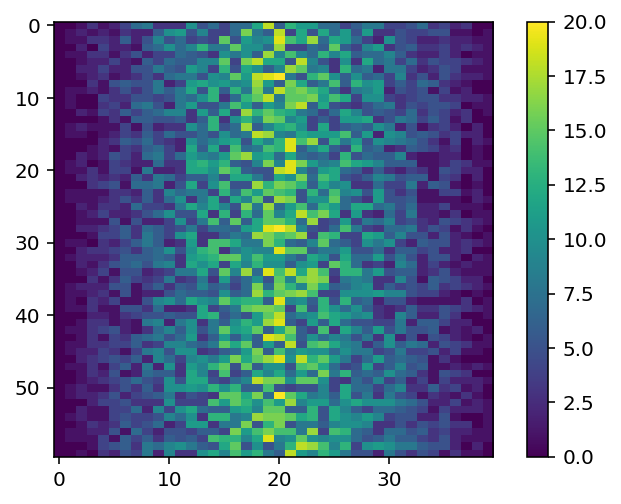

In [3]:
plt.imshow(data, aspect=0.66) 
cb = plt.colorbar(fraction=0.045)

`aspect` controls the width of one x unit vs. one y unit.
`fraction` controls the size of the colorbar compared to the plot.

Blue regions in this heatmap are low values, while yellow shows high values. As we can see, inflammation rises and falls over a 40-day period.

Let's take a look at the average inflammation over time: we now plot a line plot using the function `plot`. It can be given x and y data, but if given only one series it will use it as y and infer x to be consecutive number from 0 to length of y.

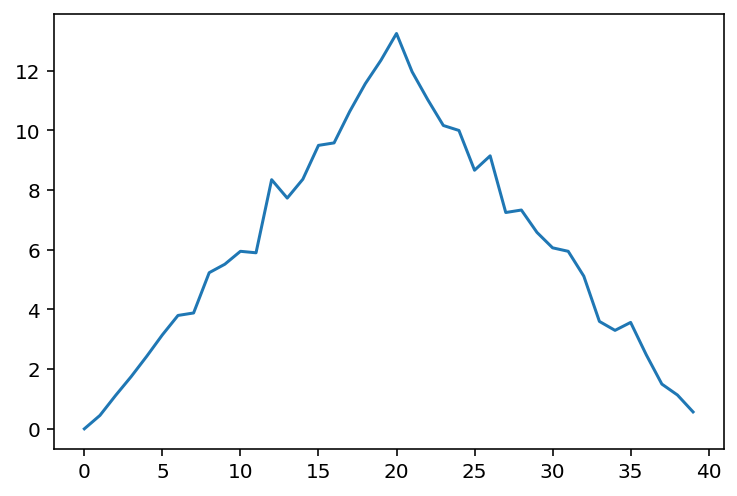

In [4]:
avg_inflammation = data.mean(axis=0)
plt.plot(avg_inflammation);

Here, we have put the average per day across all patients in the variable `avg_inflammation`, then used `plot` to create and display a line graph of those values. The result is roughly a linear rise and fall, which is suspicious: based on other studies, we expect a sharper rise and slower fall.

Let's just plot all the lines and add labels. We set transparency to 30% using the `alpha` keyword.

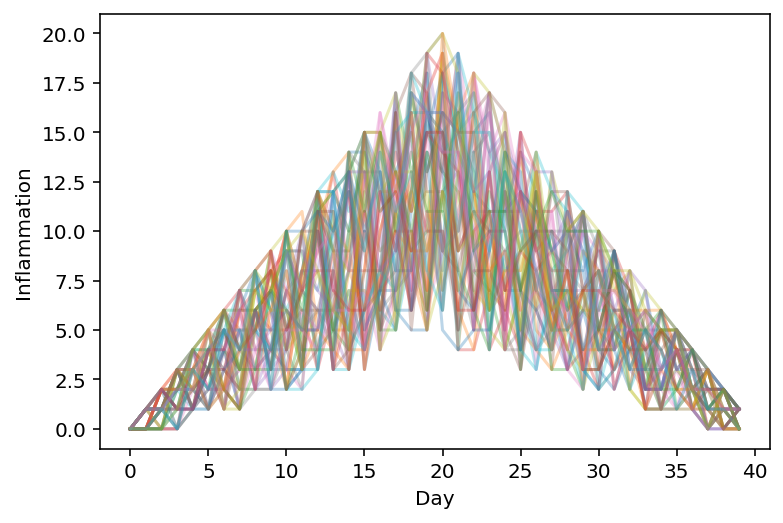

In [5]:
for i in range(n_patients):
    plt.plot(data[i], alpha=0.3)
plt.xlabel('Day')
plt.ylabel('Inflammation');

## Exercise 1

Let's have a look at two other statistics.
**Plot the average, minimum, and maximum inflammation, all on the same plot.**

Also create a legend (`plt.legend`) with appropriate labels for each line.
Labels can be specified by adding `label=....` to `plot`.
Don't forget to add axes labels using `plt.xlabel` and `plt.ylabel`.

**Reminder**
- Edit cell by double clicking
- Run cell by pressing _Shift+Enter_
- Get autocompletion by pressing _Tab_
- Get documentation by pressing _Shift+Tab_

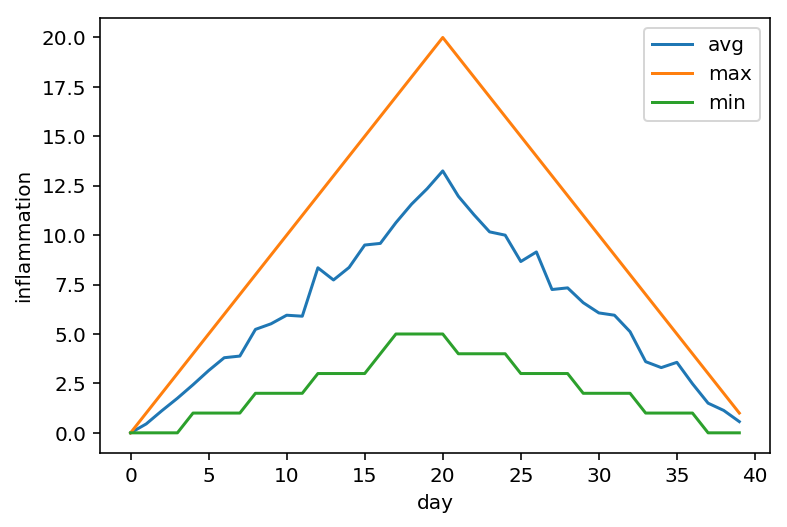

Next lets do a box plot -- Matplotlib will calculate the boxes for us.

- `medianprops` is a dictionary that contains extra properties for the median.
- `plt.xticks` determines where the ticks will be drawn (1st argument) and what they will say (2nd argument).

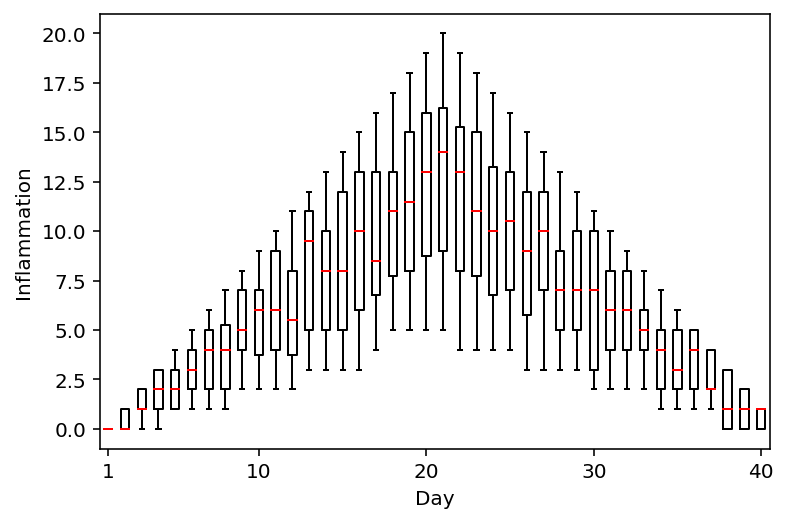

In [7]:
plt.boxplot(data,sym='', medianprops=dict(color='r'))
plt.xlabel('Day')
plt.ylabel('Inflammation')
plt.xticks([1, 10, 20, 30, 40], [1, 10, 20, 30, 40]);

Another way to visualize the dispersion is by plotting the mean and highlighting the area that contains $\pm$ standard deviation.

This is done using the `plt.fill_between(x, y1, y2)` function, which fills the ares between two lines: `(x, y1)` and `(x, y2)`.

Again, we use `alpha` to set the transparency.

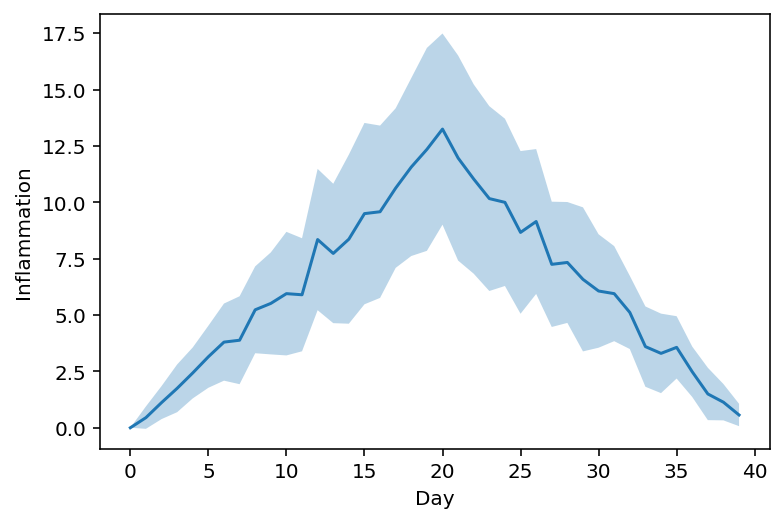

In [8]:
avg_inflammation = data.mean(axis=0)
std_inflammation = data.std(axis=0)

plt.plot(avg_inflammation)
plt.fill_between(
    x=range(n_days), 
    y1=avg_inflammation + std_inflammation, 
    y2=avg_inflammation - std_inflammation,
    alpha=0.3
)

plt.xlabel('Day')
plt.ylabel('Inflammation');

## Exercise 2

`plot` draws points with lines connecting them. 
But there are other plotting functions - a useful one is `bar`, which draws bars.

**Plot the max of each patient using a bar plot.**

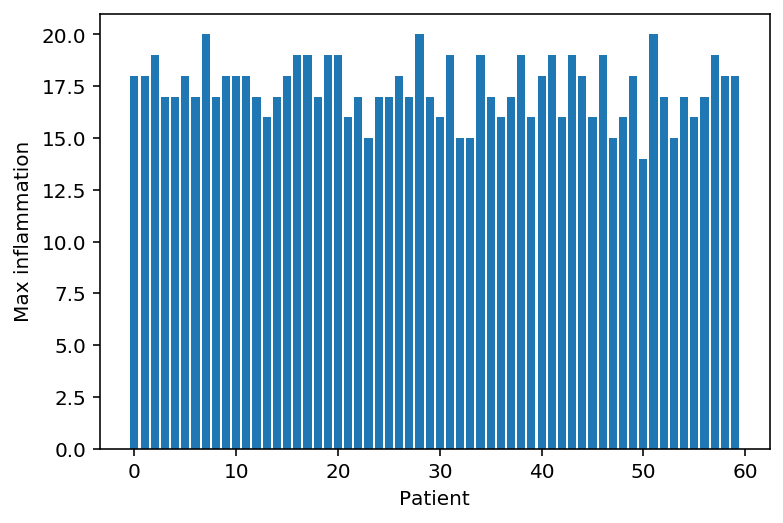

## Axes methods vs. pyplot

Importantly, everything that can be done using `plt` can be done by creating explicit figures and axes and calling methods of an `Axes` object.
For example, when calling `plt.xlim(1, 10)`, `pyplot` calls `x.set_xlim(1, 10)` on whichever `Axes` is "current". Here is an equivalent version of the above example using the axes API.

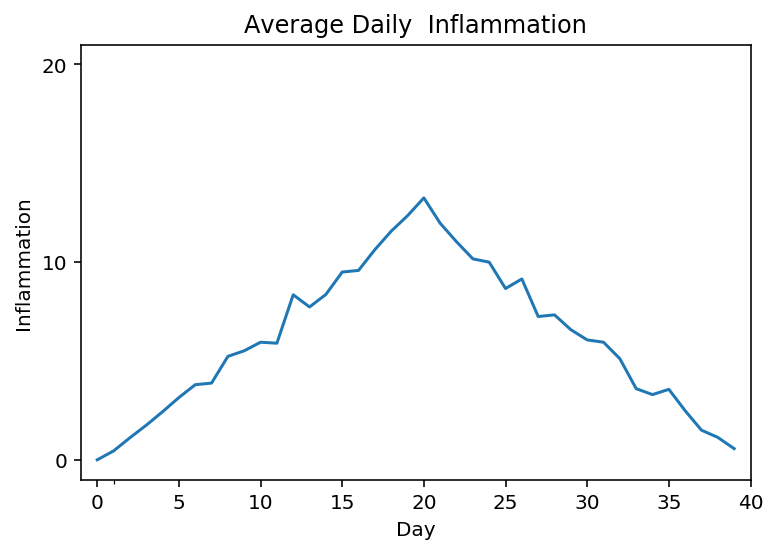

In [9]:
fig, ax = plt.subplots()
ax.plot(avg_inflammation)
ax.set_xlabel('Day')
ax.set_ylabel('Inflammation')
ax.set_title('Average Daily  Inflammation')
ax.set_xticks([1, 10, 20, 30, 40], [1, 10, 20, 30, 40])
ax.set_yticks([0, 10, 20])
ax.set_ylim(-1, 21)
ax.set_xlim(-1, 40);

### Multiple Axes

We've mentioned before that a figure can have more than one `Axes` on it. If you want your axes to be on a regular grid system, then it's easiest to use `plt.subplots(...)` to create a figure and add the axes to it automatically.

For example:

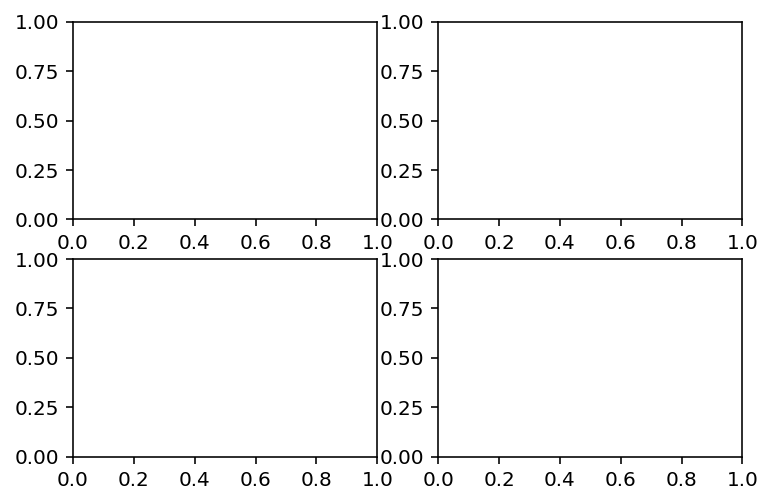

In [10]:
fig, axes = plt.subplots(2, 2) # nrows=2, ncols=2

`plt.subplots(...)` created a new figure and added 4 subplots to it. The axes object that was returned is a 2D numpy array. Each item in the array is one of the subplots. They're laid out as you see them on the figure.

Therefore, when we want to work with one of these axes, we can index the axes array and use that item's methods.

For example:

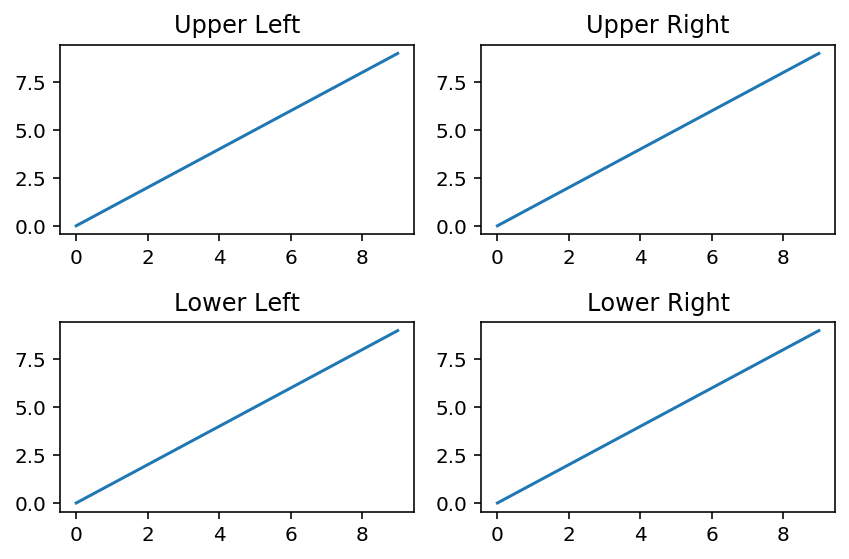

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0,0].set(title='Upper Left')
axes[0,1].set(title='Upper Right')
axes[1,0].set(title='Lower Left')
axes[1,1].set(title='Lower Right')

# To iterate over all items in a multidimensional numpy array, 
# use the `flat` attribute
for ax in axes.flat:
    ax.plot(range(10), range(10))

fig.tight_layout()

When `plt.subplots` is called with no arguments, it creates a new figure with a single subplot. So this will be our default way of creating a figure and axes.

*Tip* when you've finished plotting, call `fig.tight_layout()` to fix the layout.

## Exercise 3

**Reproduce the figure shown below**, which shows the inflammation of the first 8 patients.

You can use the arguments `sharex` and `sharey` of `plt.subplots` to make all the axes share their x- and y-axis.

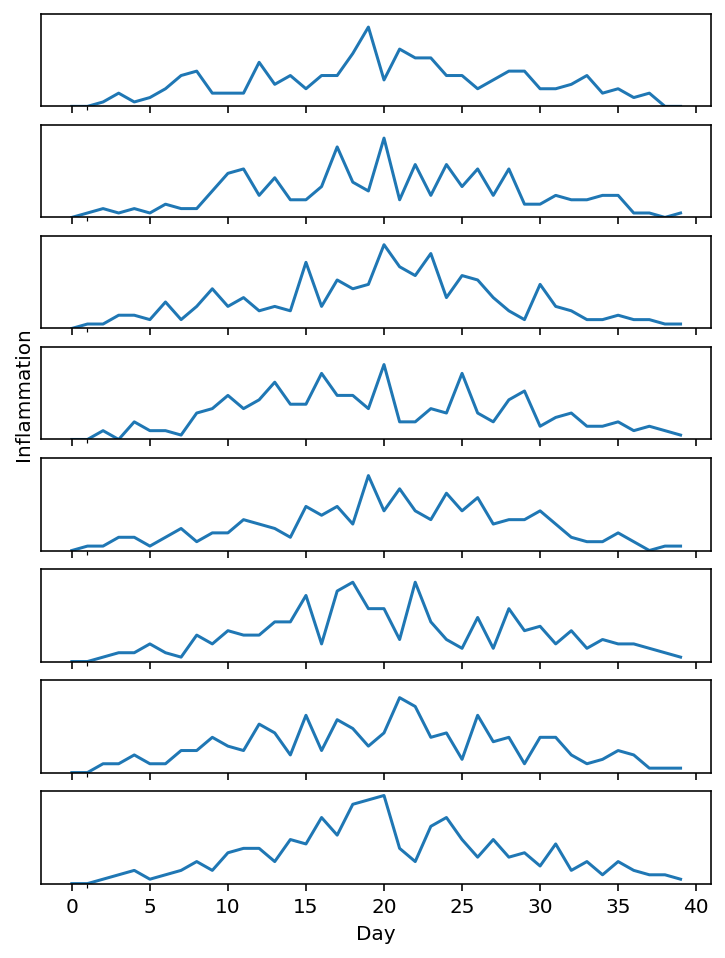

# References

- **[Matplotlib gallery](https://github.com/rasbt/matplotlib-gallery)**
- [Anatomy of Matplotlib](https://github.com/WeatherGod/AnatomyOfMatplotlib) tutorial by [Benjamin Root](https://github.com/WeatherGod).
- Slides: [Introduction to NumPy, SciPy, and matplotlib](https://speakerdeck.com/cfinch/introduction-to-numpy-scipy-and-matplotlib) by Craig Finch.
- Notebooks: [Long Matplotlib tutorial](http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb)
- [How to speak Matplotlib](http://nbviewer.jupyter.org/github/yoavram/AnatomyOfMatplotlib/blob/master/AnatomyOfMatplotlib-Part3-HowToSpeakMPL.ipynb) - control colors, markers, linestyles, plot attributes, colormaps, annotations, arrows, hatches, transforms, and rc configuration.
- [Limits, legends, & layouts](http://nbviewer.jupyter.org/github/yoavram/AnatomyOfMatplotlib/blob/master/AnatomyOfMatplotlib-Part4-Limits_Legends_and_Layouts.ipynb)- [Why People Hate Jet – and You Should Too](https://jakevdp.github.io/blog/2014/10/16/how-bad-is-your-colormap/)
- Jake Vanderplas's [Minesweeper in Matplotlib](https://jakevdp.github.io/blog/2012/12/06/minesweeper-in-matplotlib/), [Quaternions and Key Bindings: Simple 3D Visualization in Matplotlib](http://jakevdp.github.io/blog/2012/11/24/simple-3d-visualization-in-matplotlib/) and [3D Interactive Rubik's Cube in Python](http://jakevdp.github.io/blog/2012/11/26/3d-interactive-rubiks-cube-in-python/) are amazing examples of what can be done with Matplotlib beyond simple plots and using a GUI.

# Colophon
This notebook was written by [Yoav Ram](http://python.yoavram.com).

The notebook was written using [Python](http://python.org/) 3.7.
Dependencies listed in [environment.yml](../environment.yml).

This work is licensed under a CC BY-NC-SA 4.0 International License.

![Python logo](https://www.python.org/static/community_logos/python-logo.png)